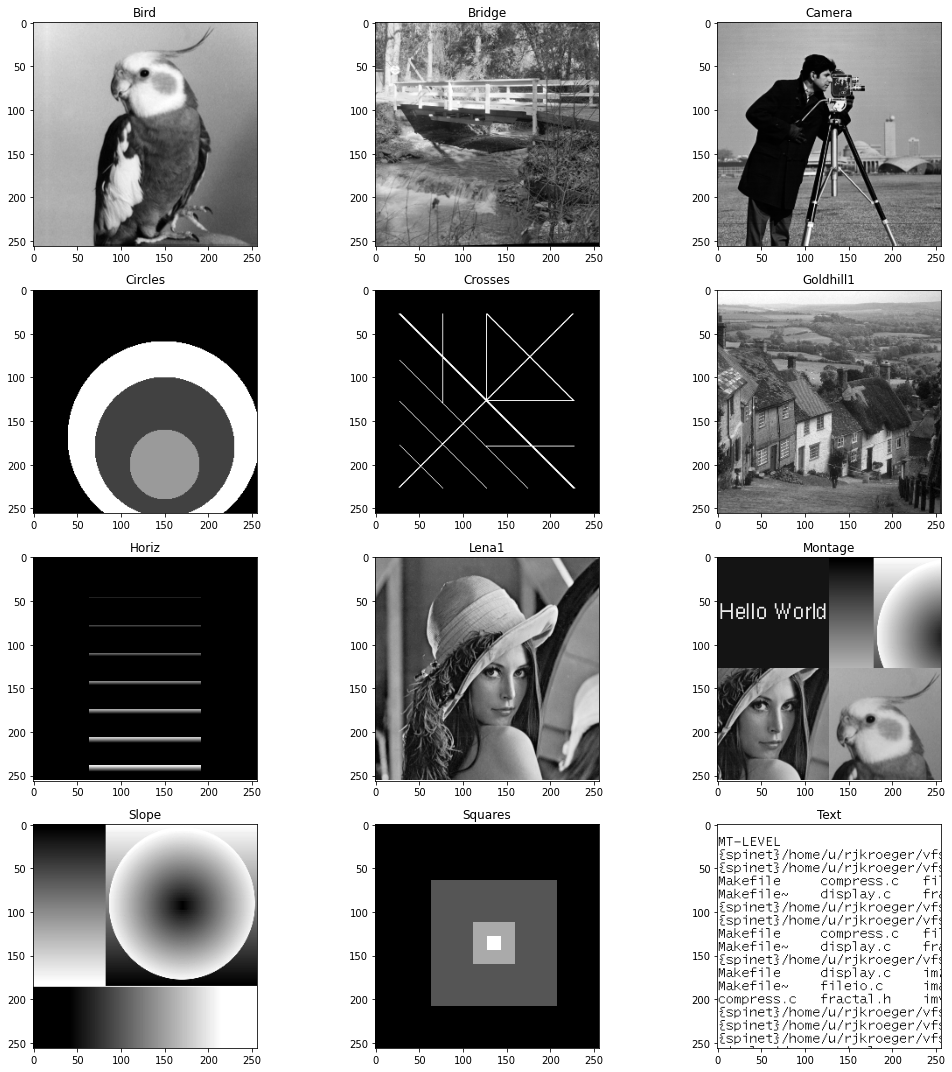

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




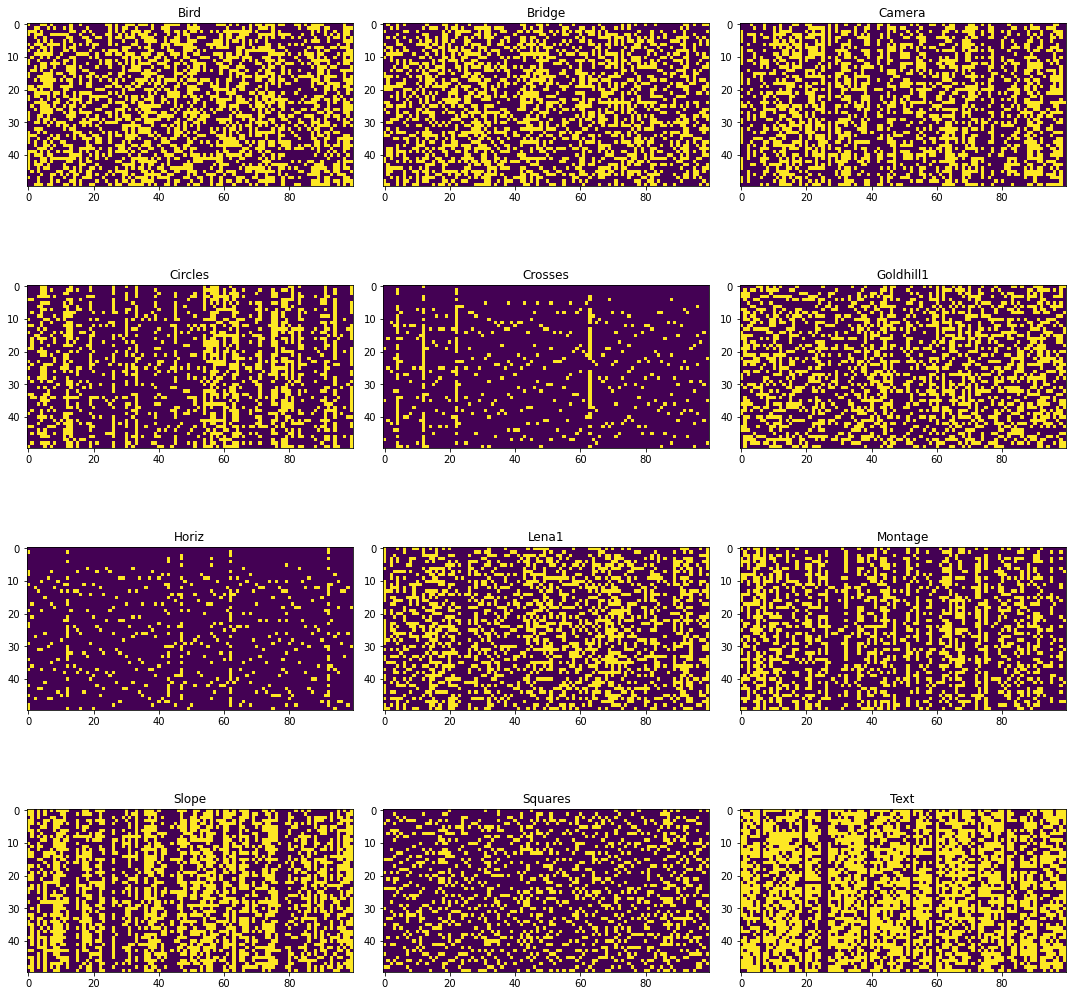

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1320xBatch: 1/1 (100%) 5363.057ms


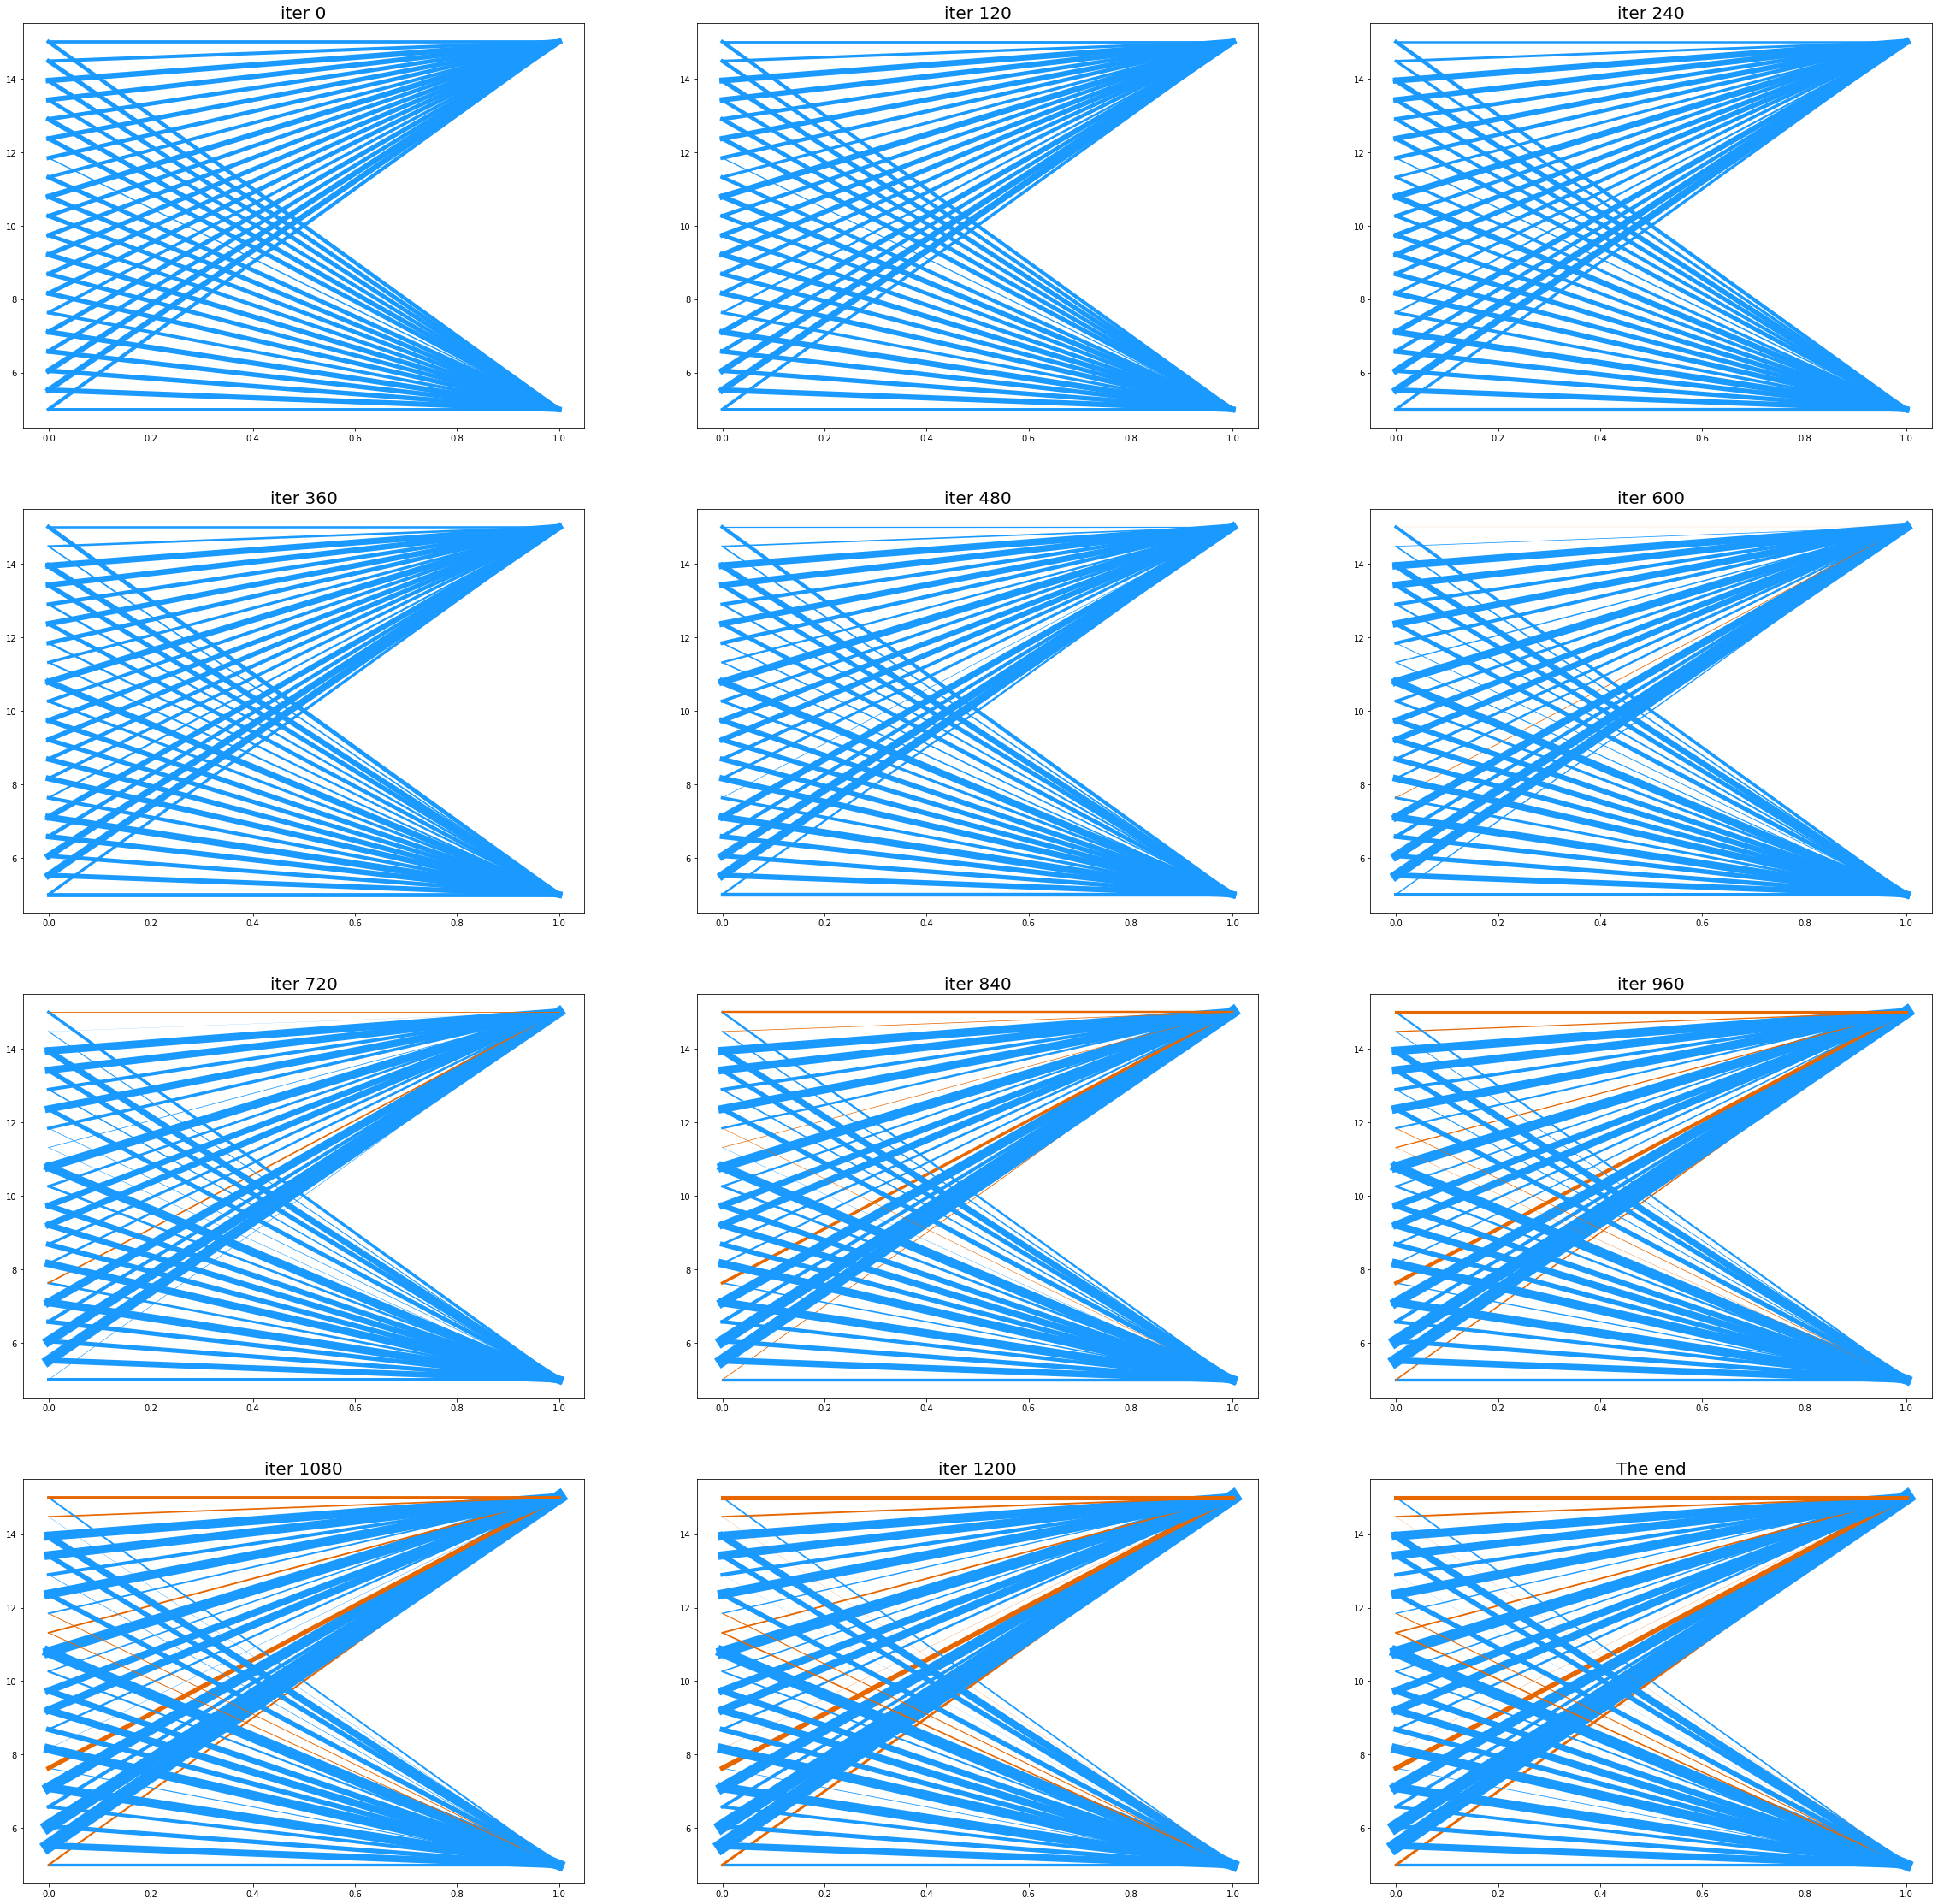

torch.Size([2916, 2])
torch.Size([570, 2])
Weights:
N1 & N2 & diff \\
32.94 & -30.23 & 63.17\\
80.59 & 167.15 & -86.55\\
51.85 & 153.21 & -101.36\\
37.45 & 37.21 & 0.25\\
109.76 & 123.53 & -13.77\\
8.46 & -57.01 & 65.47\\
109.89 & -2.46 & 112.35\\
60.6 & 26.73 & 33.87\\
85.81 & 92.69 & -6.88\\
73.01 & 87.37 & -14.36\\
20.23 & 17.12 & 3.12\\
130.01 & 128.1 & 1.91\\
-17.13 & -18.95 & 1.82\\
-11.39 & 14.32 & -25.71\\
57.6 & 108.38 & -50.78\\
1.57 & 43.62 & -42.05\\
58.99 & 96.23 & -37.24\\
82.65 & 101.3 & -18.64\\
-2.01 & -19.2 & 17.19\\
17.79 & -51.09 & 68.88\\
similarity: 0.7973808646202087


In [13]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from metrics import weights_similarity

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10, 'learn': 'rstdp'}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=1, image_dur=15, image_sleep=15, iters=1320, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=120)
plt.show()
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

# Similarity
print("\33[1mWeights:")
print("N1 & N2 & diff \\\\")
for i in range(model.syn.W.shape[0]):
    print(f"{round(model.syn.W[i, 0].item(), 2)} & {round(model.syn.W[i, 1].item(), 2)} & {round((model.syn.W[i, 0] - model.syn.W[i, 1]).item(), 2)}\\\\")
print(f"similarity: {weights_similarity(model.syn.W)}")


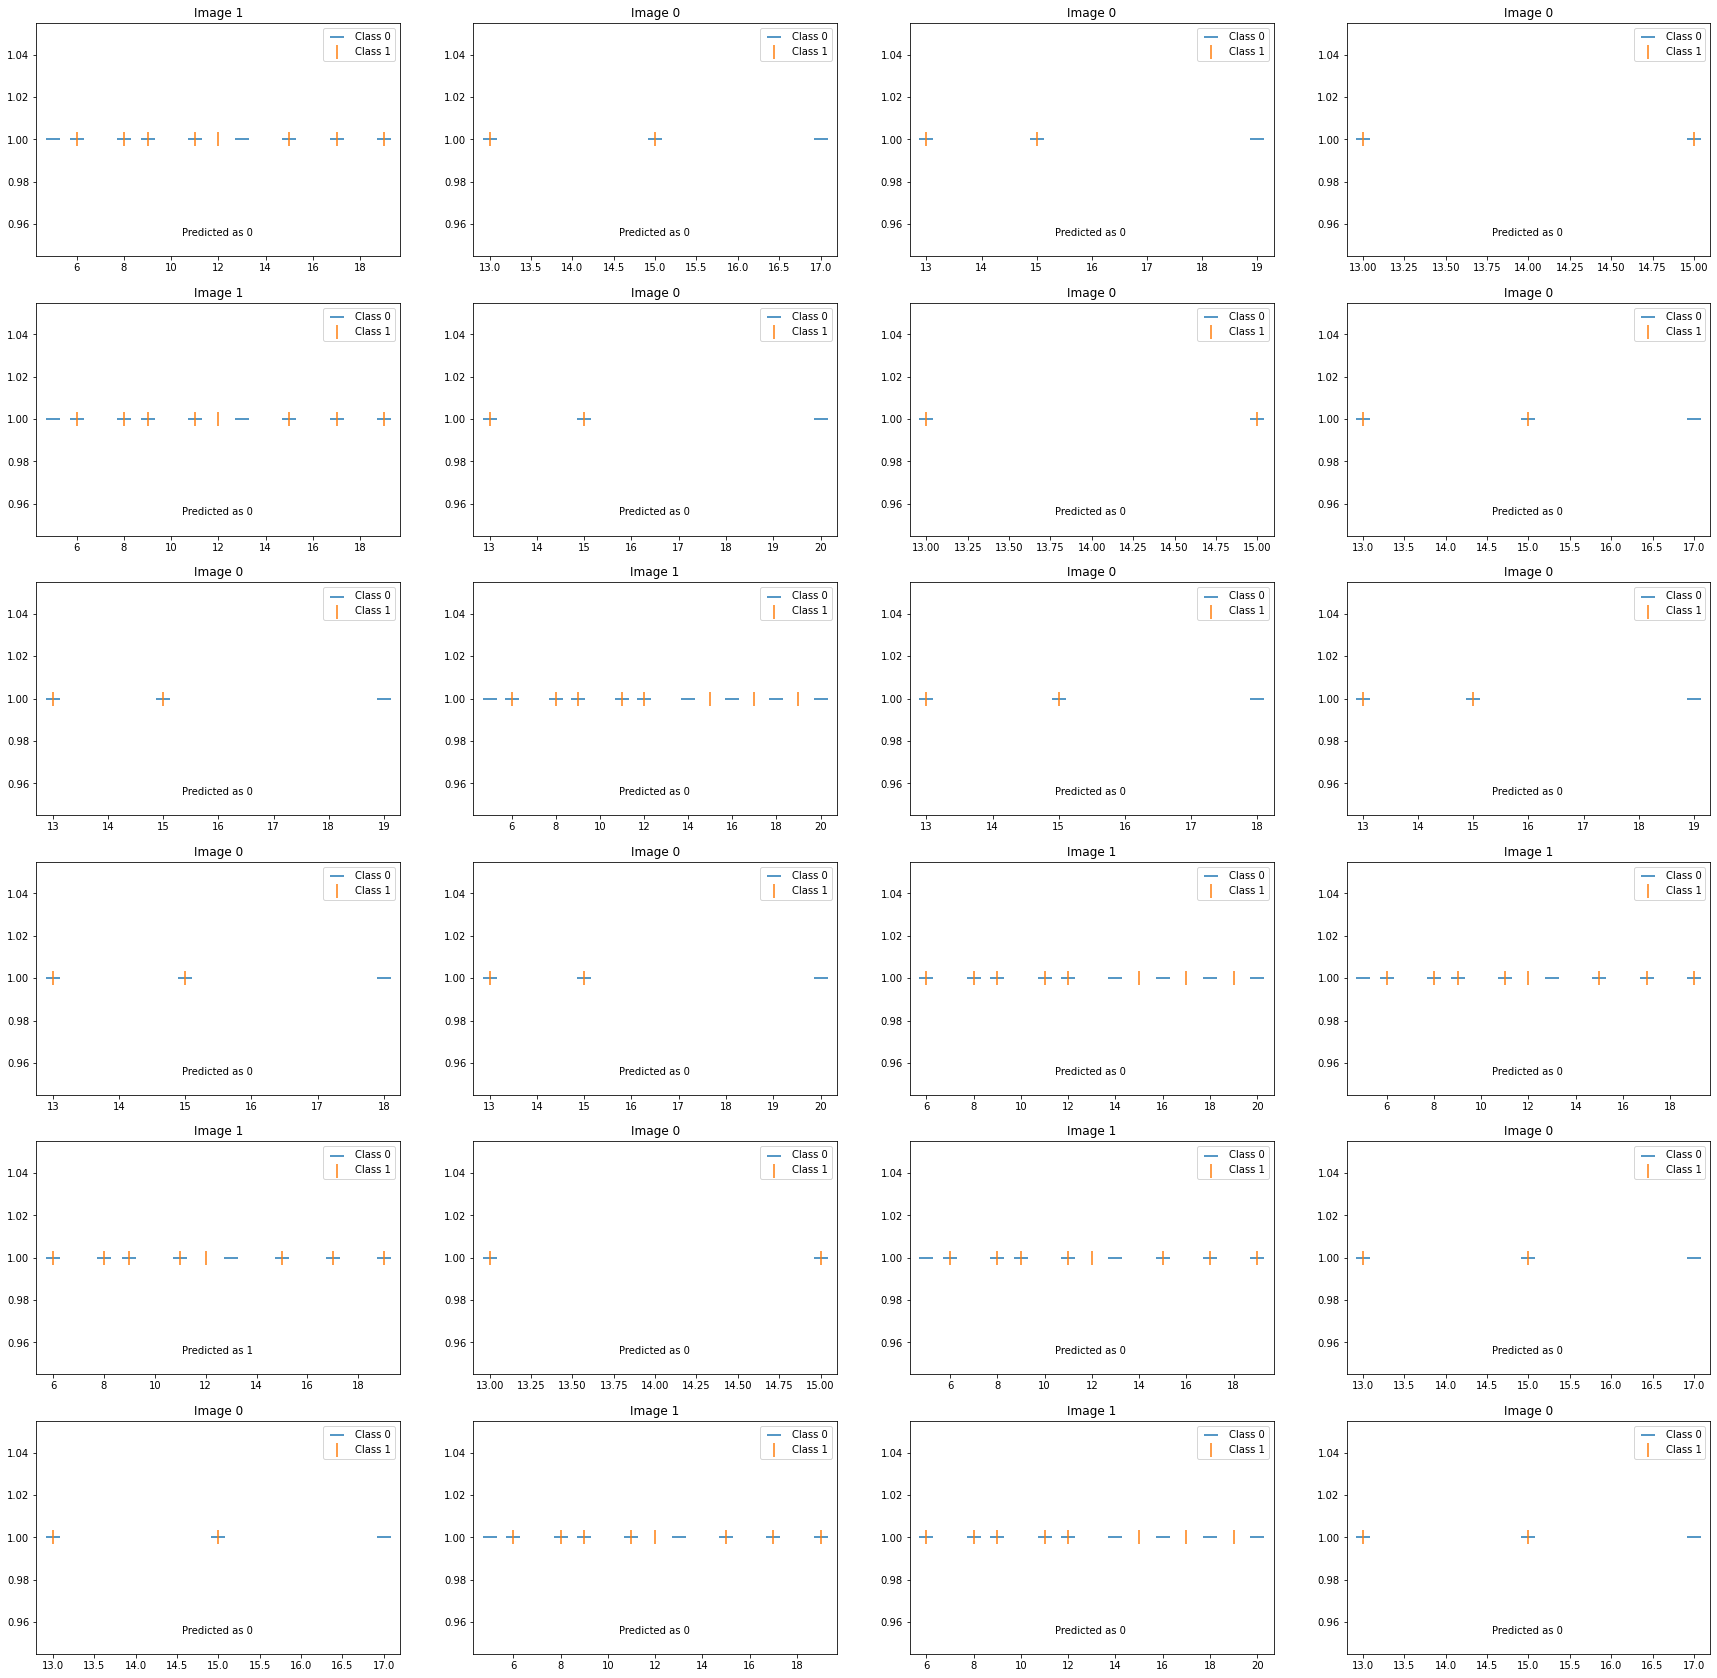

Accuracy: 16/24 = 0.6666666666666666


In [14]:
import torch
import matplotlib.pyplot as plt
testNum = 24
corrects = 0
fig, ax = plt.subplots(testNum // 4, 4, figsize=(30, 5 * testNum // 4))
for i in range(testNum):
    result = model.test()
    ng_out = result['ng_out']
    actual = result['actual']
    predict = result['predict']
    zeros = ng_out['spike', 0][:, 1] == 0
    ax[i // 4, i % 4].scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_', s=200)
    ax[i // 4, i % 4].scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|', s=200)
    ax[i // 4, i % 4].legend(['Class 0', 'Class 1'])
    ax[i // 4, i % 4].set_title(f"Image {actual}")
    ax[i // 4, i % 4].annotate(f"Predicted as {predict}", (0.4, 0.1), xycoords='axes fraction', va='center')
    corrects += actual == predict
plt.show()
print(f"Accuracy: {corrects}/{testNum} = {corrects / testNum}")

